In [1]:
#coding:utf-8
import datetime as dt
import statsmodels.api as sm
import pandas as pd
import json
import sys
import string
import codecs
from copy import copy
from hashlib import sha1
import hmac
import matplotlib.dates as mdates
import records
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
from matplotlib.dates import datestr2num
import matplotlib.ticker as ticker
import dateutil
from collections import Counter
import seaborn as sb
%matplotlib inline


In [2]:
#导入表，重新命名列
df = pd.read_csv('starter_score_analyse2.csv')
df.columns = ['id','game_type_id','game_id','time','game_name',
          'team_id','team_no','team_name','avg_union_score',
          'min_union_score','max_union_score','mid_union_score',
          'avg_total_score','min_total_score','max_total_score',
          'mid_total_score','avg_ftime','min_ftime','max_ftime','mid_ftime']

#转换时间格式并去掉错误的数据

#df['time'] = df['time'].str.replace('2019-12-31 22:00:00','2019-6-29 22:00:00')
df['time'] = pd.to_datetime(df['time'])


df = df[df['time']<'2019-11-20 00:00:00']

#按照时间排序
df = df.sort_values(by = ['time'],ascending = True)
df.sample(5)

,id,game_type_id,game_id,time,game_name,team_id,team_no,team_name,avg_union_score,min_union_score,max_union_score,mid_union_score,avg_total_score,min_total_score,max_total_score,mid_total_score,avg_ftime,min_ftime,max_ftime,mid_ftime
1471,1473,7,321,2019-09-15 09:00:00,2019 MakeX机器人挑战赛成都积分赛,6481,X022121,流星队,65,5,105,75,158,110,235,143,240,240,240,240
2255,2257,7,362,2019-07-13 08:00:00,2019 世界机器人大赛华东赛区,5827,X012481,书人4队,106,40,140,123,161,40,280,163,232,206,240,240
1878,1880,7,346,2019-07-18 00:00:00,2019MakeX机器人挑战赛岳阳楼区积分赛,4429,X018122,一颗莓,99,60,130,105,221,165,245,238,229,183,240,240
2060,2062,7,352,2019-07-28 09:00:00,2019MakeX机器人挑战赛深圳积分赛 欢乐海岸海洋奇梦馆,6341,X019432,Letron3,43,25,60,43,33,5,60,33,222,204,240,222
1565,1567,7,326,2019-07-14 10:00:00,2019MakeX机器人挑战赛甘肃省积分赛,5436,X028024,寓乐湾*TW战队,35,5,50,43,93,55,130,93,240,240,240,240


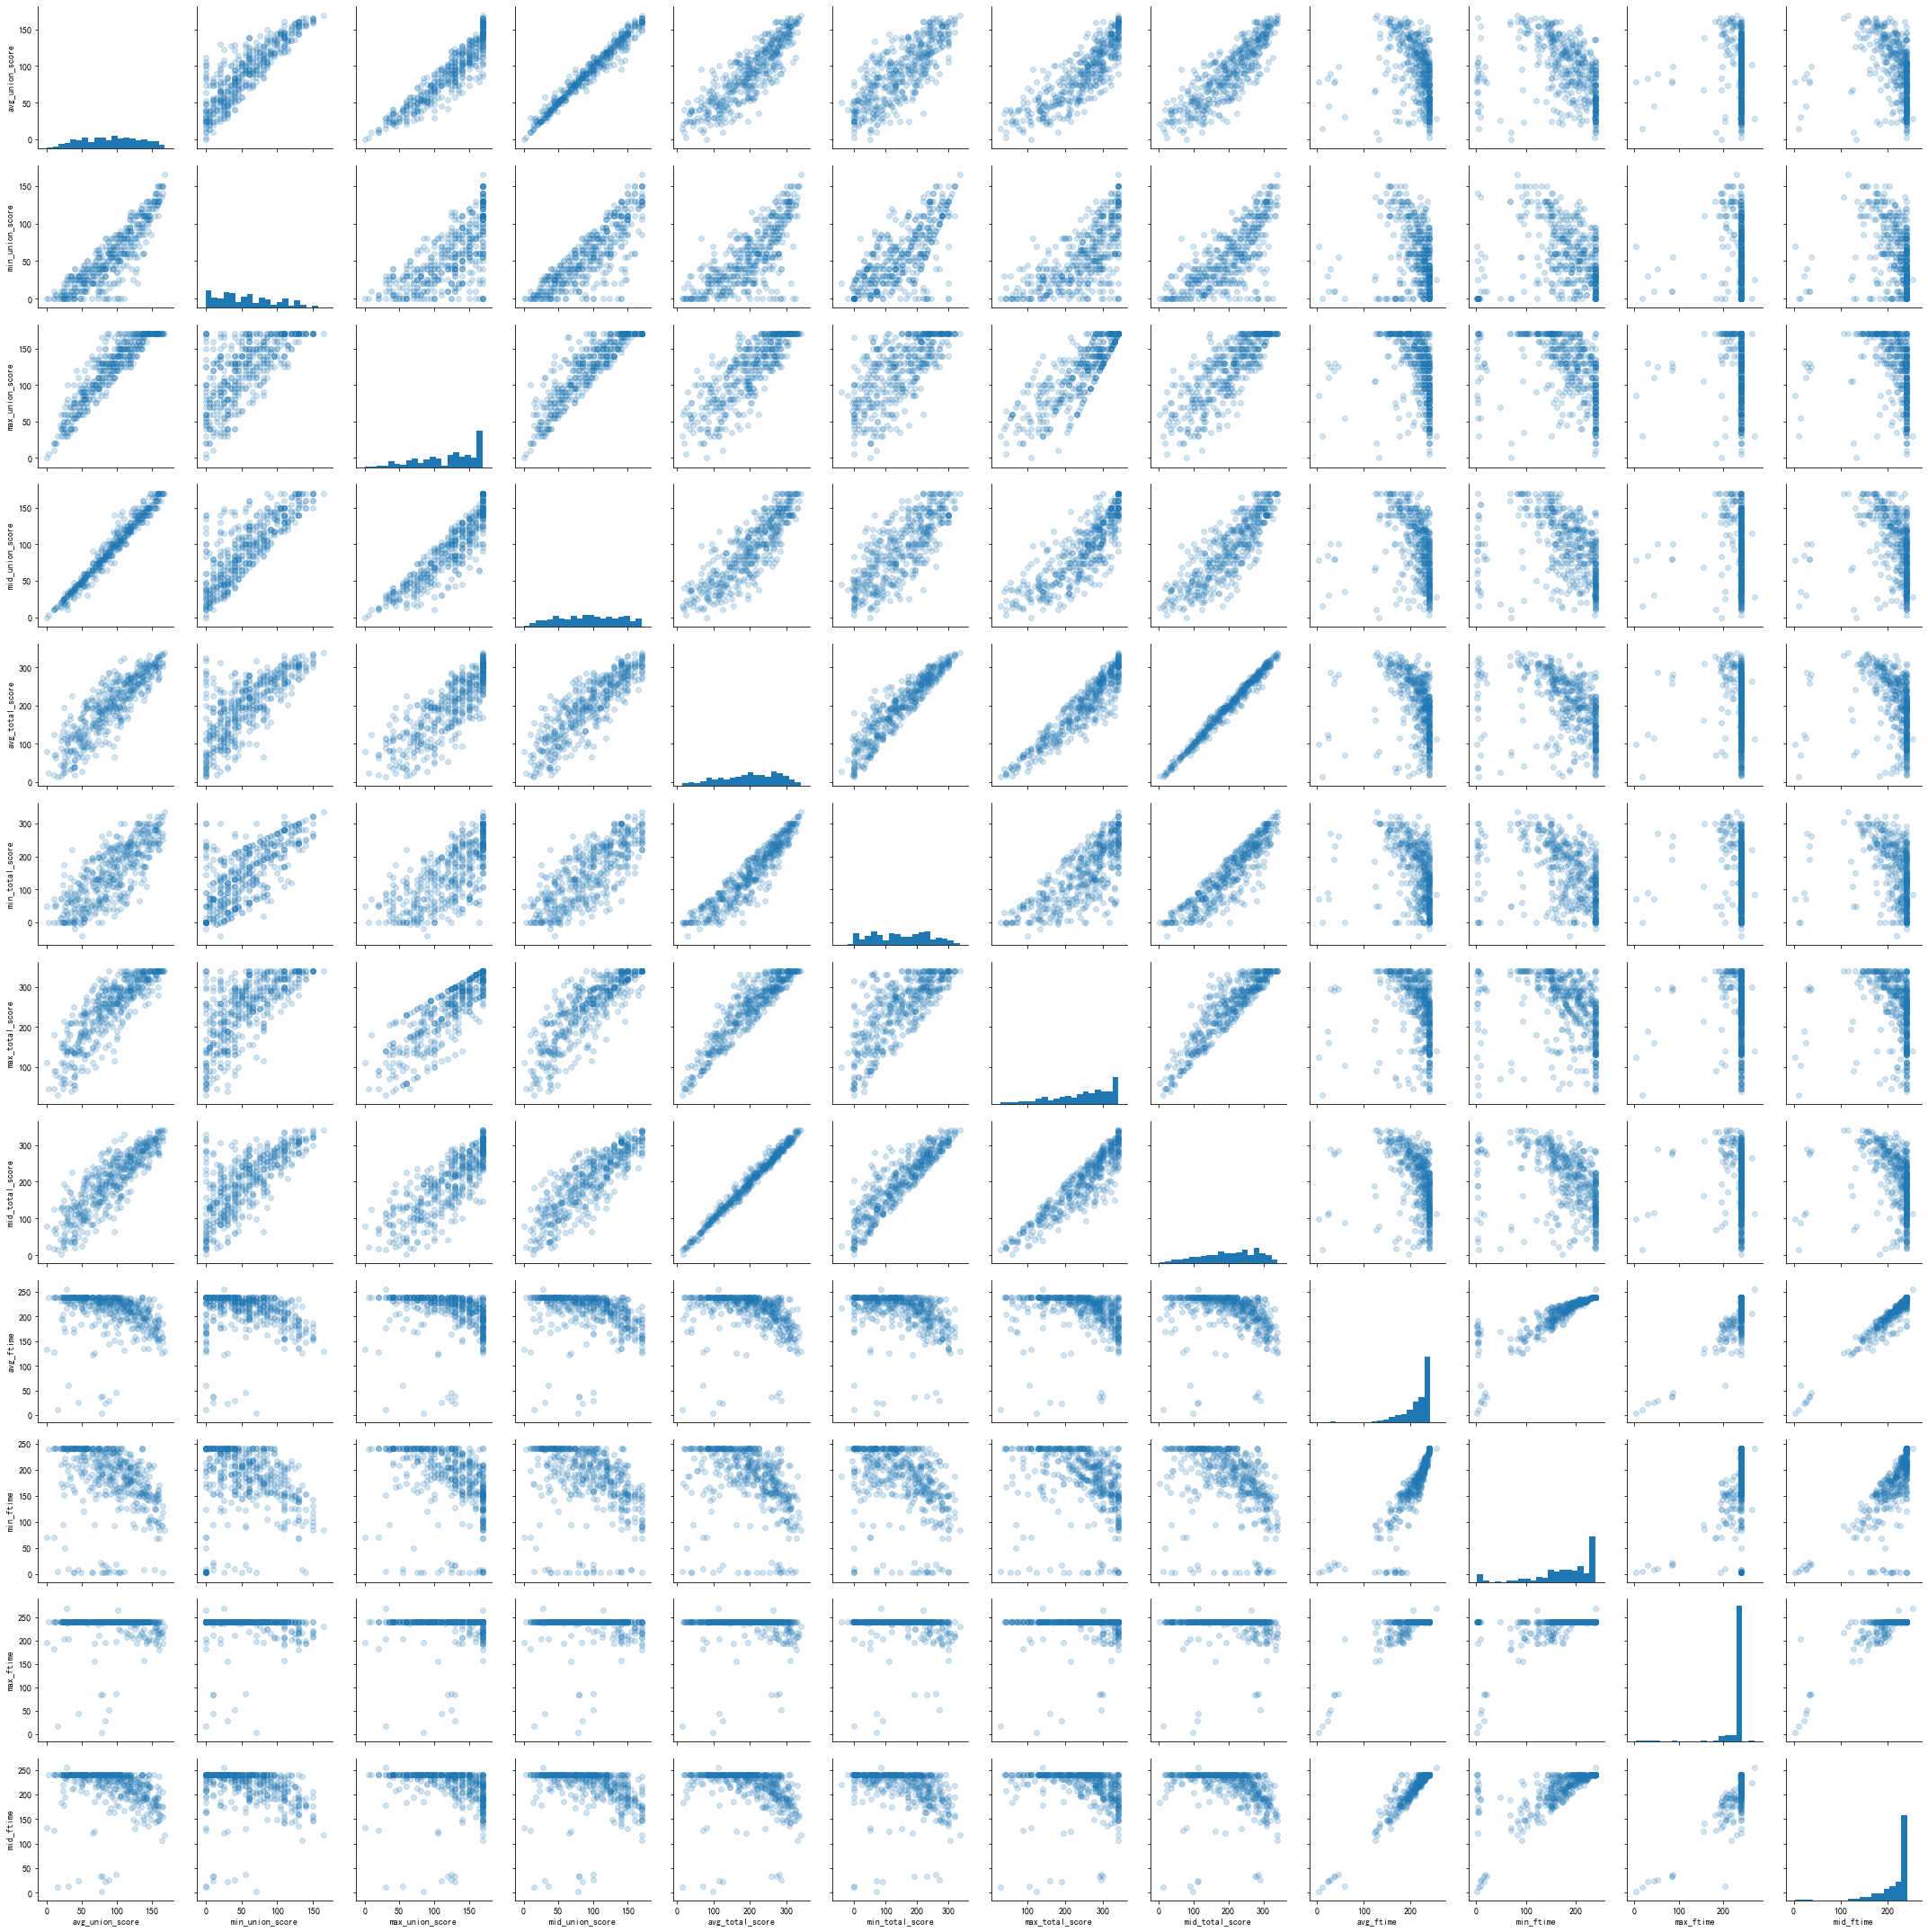

In [84]:
numeric_vars = ['avg_union_score','min_union_score','max_union_score','mid_union_score','avg_total_score','min_total_score','max_total_score','mid_total_score','avg_ftime','min_ftime','max_ftime','mid_ftime']
samples = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.loc[samples,:]

g = sb.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter, alpha = 1/5)

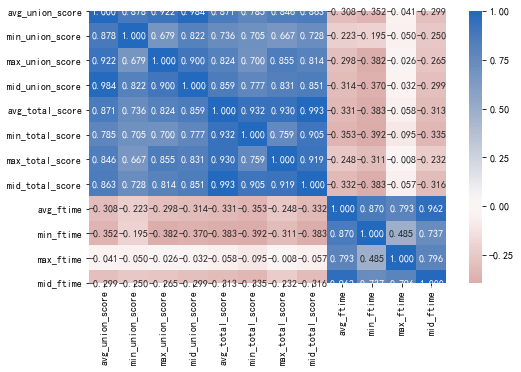

In [85]:
#热图， 时间和得分没有关系
plt.figure(figsize = [8, 5])
sb.heatmap(df_samp[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

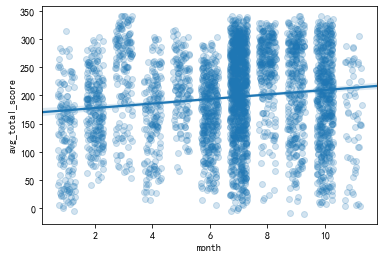

In [4]:
#Starter 自动赛平均
df['time'] = pd.to_datetime(df['time'])
df['month'] = df['time'].dt.month
df.dtypes
sb.regplot(data = df,x= 'month',y = 'avg_total_score',x_jitter = 0.3,scatter_kws = {'alpha':1/5})

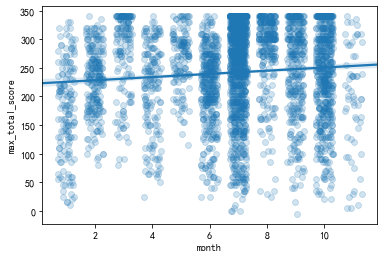

In [87]:
##Starter 自动赛平均
# df['time'] = pd.to_datetime(df['time'])
df['month'] = df['time'].dt.month
sb.regplot(data = df,x= 'month',y = 'max_total_score',x_jitter = 0.3,scatter_kws = {'alpha':1/5})

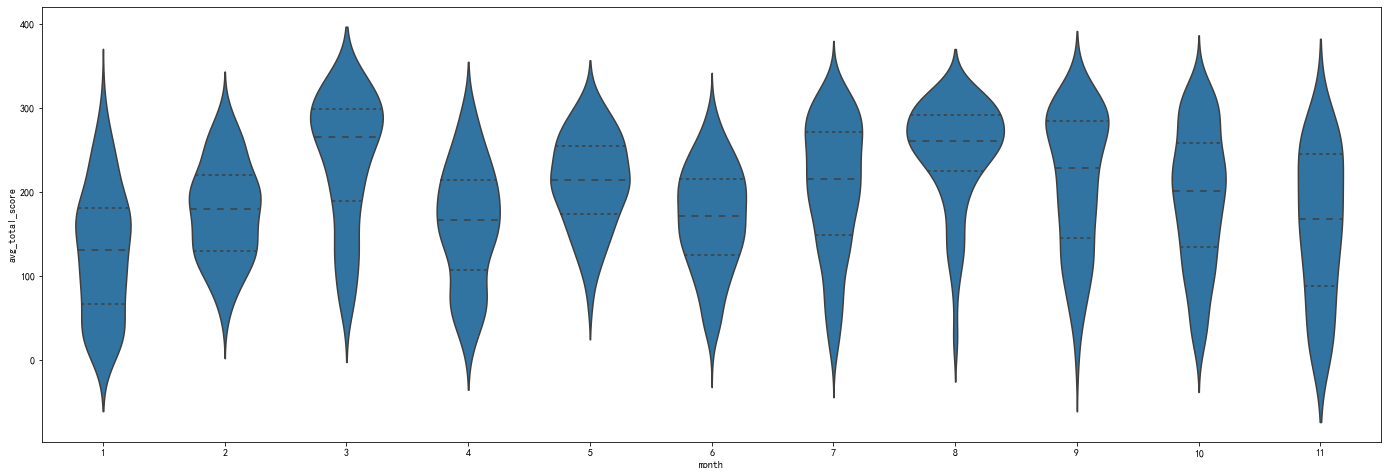

In [88]:
#按月份看一下数据分布
df['game_name'].astype('str')
base_color = sb.color_palette()[0]
# df2=  df[df['time'] > '2019/8/31 00:00:00']
ax2 = plt.figure(figsize = (24,8))
ax2 = sb.violinplot(data = df, x='month', y='avg_total_score',inner = 'quart',color = base_color)


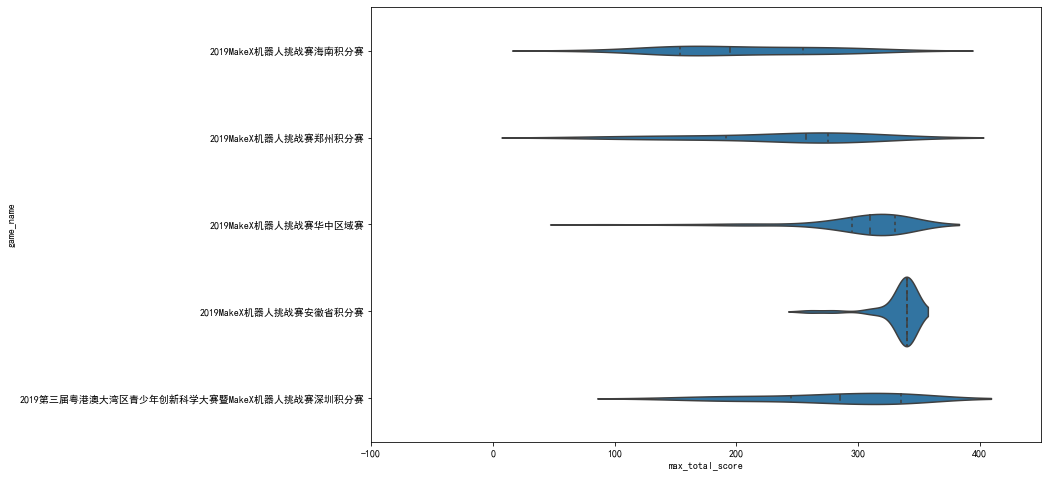

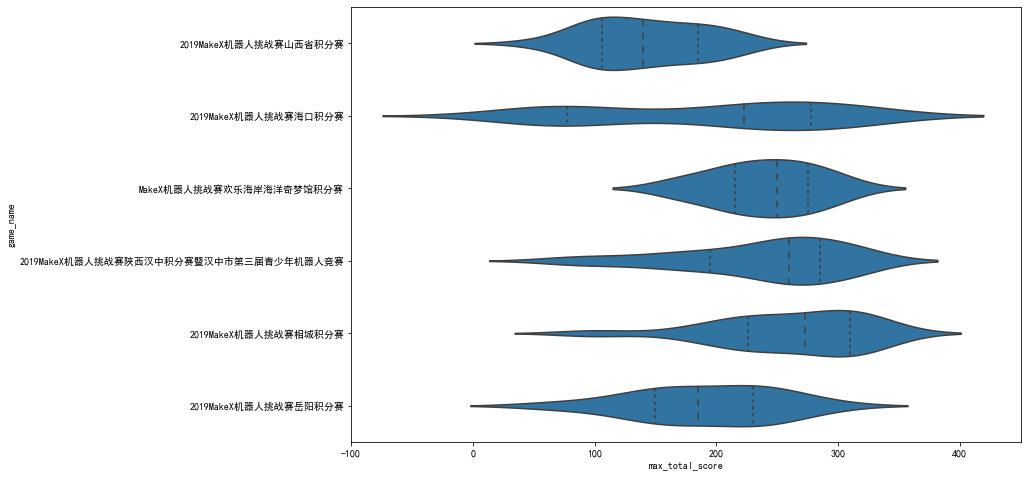

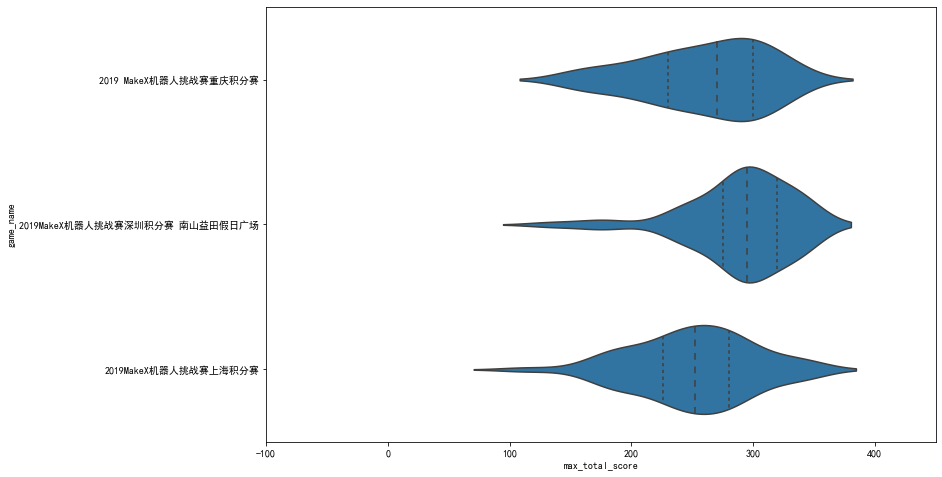

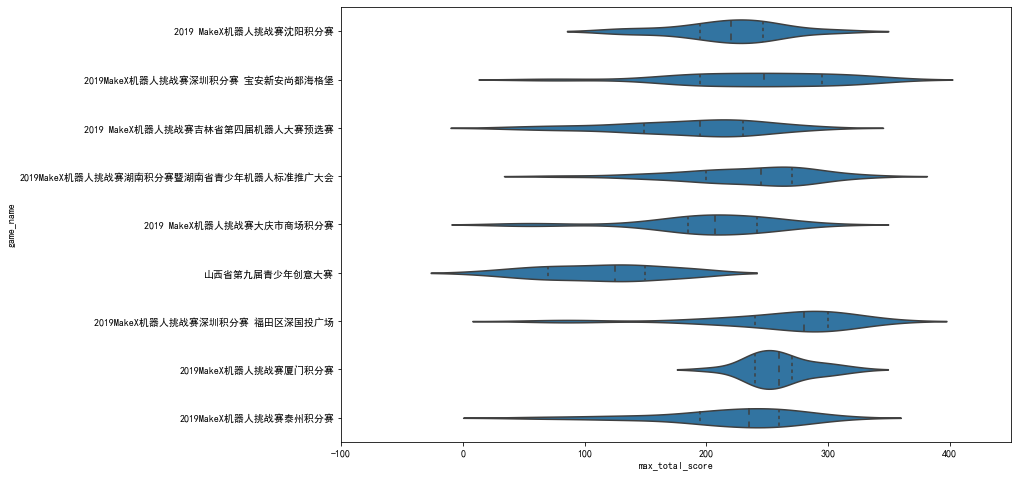

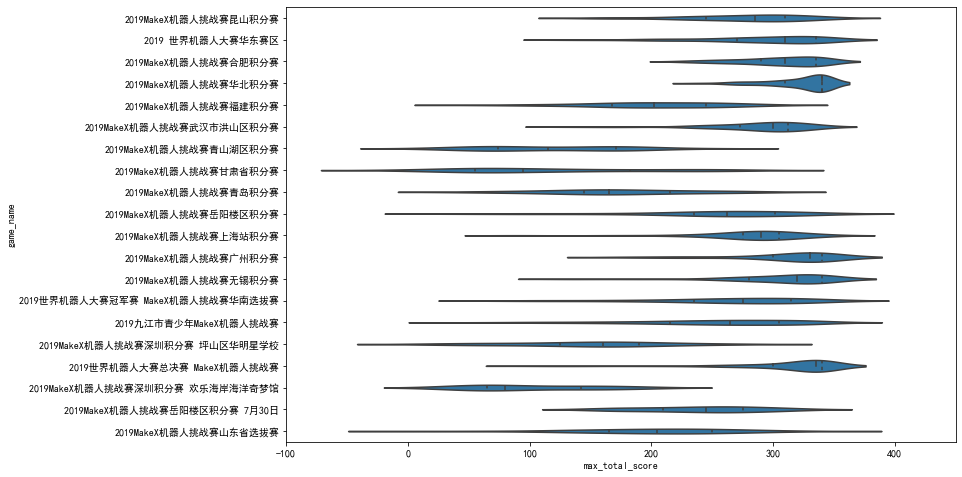

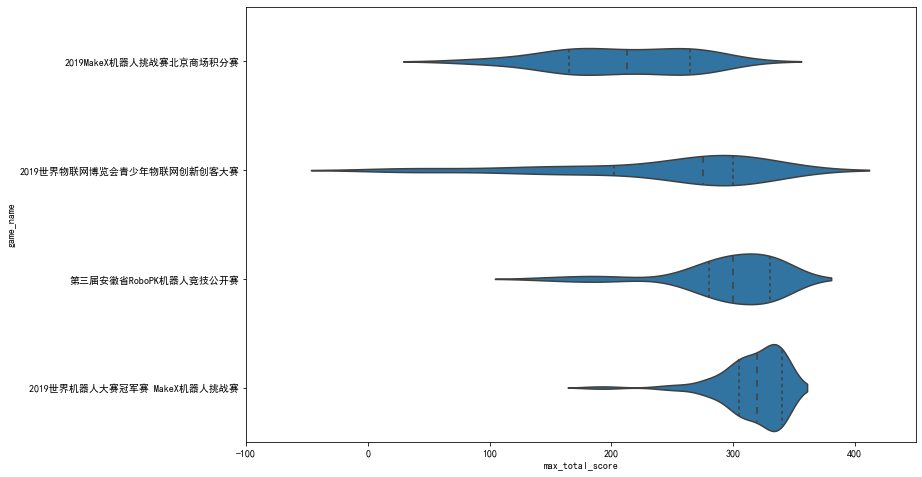

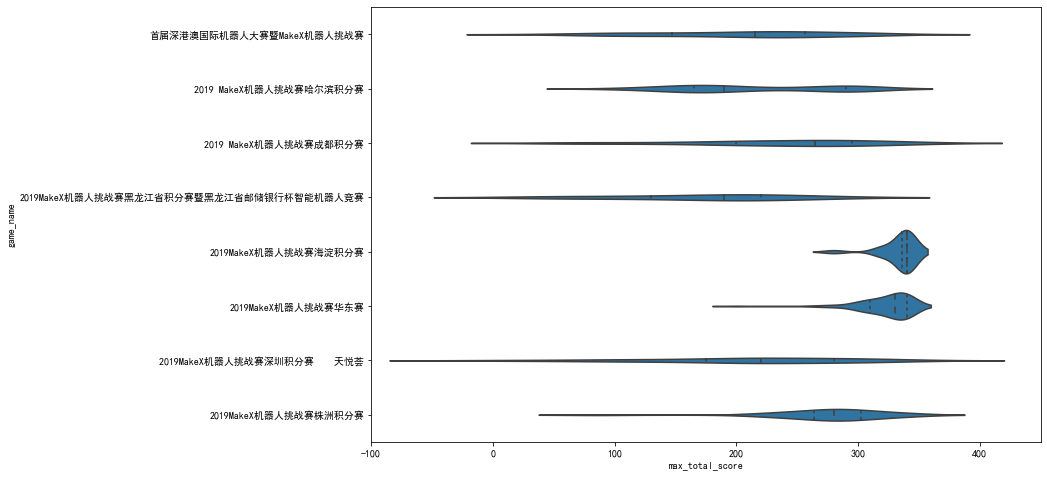

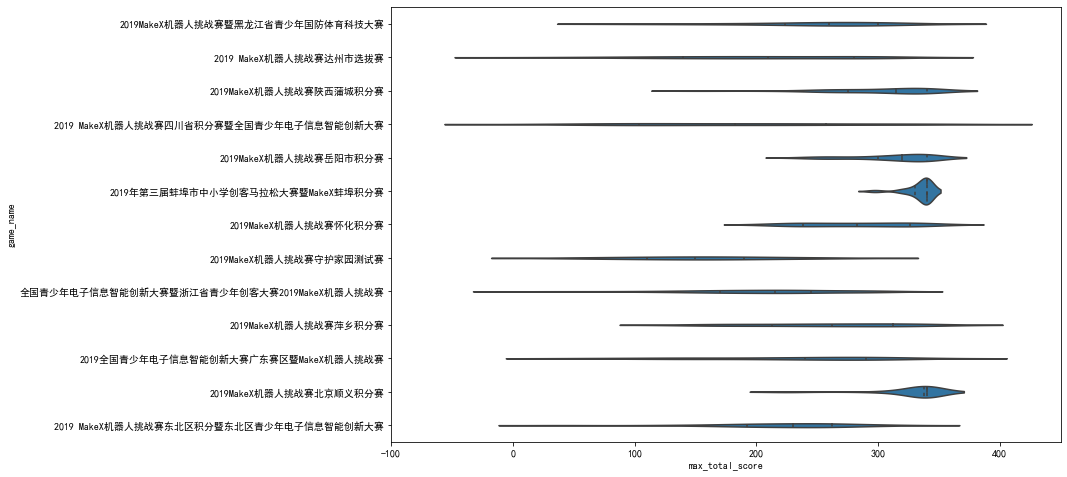

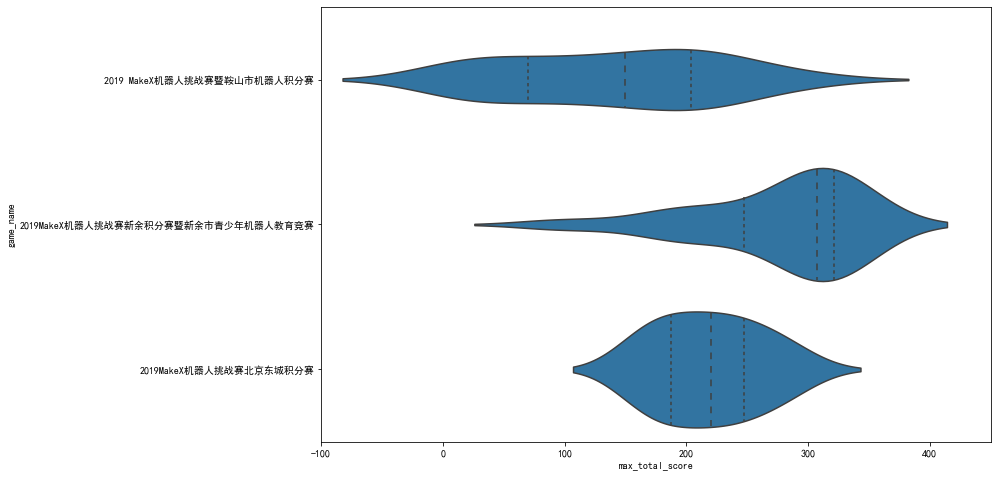

In [25]:
#11月
df['game_name'].astype('str')
base_color = sb.color_palette()[0]
for i in range (3,12):
    df2 = df[df['month'] == i]
    plt.figure(figsize = (12,8))
    sb.violinplot(data = df2, y='game_name', x='max_total_score',inner = 'quart',color = base_color)
    plt.xlim(-100,450)

In [26]:
base_color = sb.color_palette()[0]
df3 = df[df['max_total_score']>=340]
per1 = df['month'].value_counts()
per2 = df3['month'].value_counts()
# per = per2/per1
# per
per1

# sb.countplot(data = df3,x = 'month',color = base_color)

7     1064
10     552
6      396
9      339
8      279
2      233
4      171
1      158
3      156
5      144
11      61
Name: month, dtype: int64

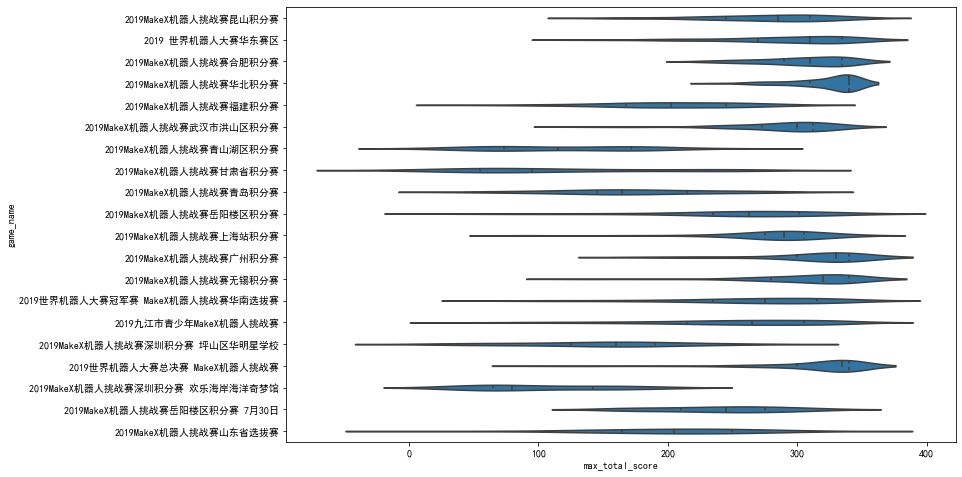

In [98]:
#11月
df['game_name'].astype('str')
base_color = sb.color_palette()[0]
df2 = df[df['month'] == 7]
ax2 = plt.figure(figsize = (12,8))
ax2 = sb.violinplot(data = df2, y='game_name', x='max_total_score',inner = 'quart',color = base_color)